In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.datasets import load_diabetes
from sklearn.model_selection  import train_test_split


data_diabetes = load_diabetes()

2023-05-28 11:21:52.334536: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 11:21:53.252093: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = data_diabetes['data']
targets = data_diabetes['target']

targets = (targets-targets.mean(axis=0))/targets.std() 

In [3]:
train_data,test_data,train_targets, test_targets = train_test_split(data,targets,test_size=0.1)

In [4]:
def model_return():
    model = Sequential([
        Dense(64,activation='relu',input_shape=(train_data.shape[1],)),
        BatchNormalization(),
        Dropout(0.5),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256,activation='relu')
        
    ])
    return model

In [5]:
model = model_return()

2023-05-28 11:21:59.932415: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-28 11:21:59.976270: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-28 11:21:59.976546: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [6]:
model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95,
    epsilon=0.005,
    axis=-1,
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.05),
    gamma_initializer=tf.keras.initializers.Constant(value=0.9)
))
model.add(Dense(1))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 256)               1

In [8]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [9]:
history = model.fit(train_data,train_targets,validation_split=0.15,epochs=100,verbose=2)

Epoch 1/100


2023-05-28 11:22:12.121776: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fbdb0002c60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-28 11:22:12.121804: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1050 Ti, Compute Capability 6.1
2023-05-28 11:22:12.127799: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-28 11:22:12.349523: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-05-28 11:22:12.515133: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11/11 - 4s - loss: 1.9539 - mae: 1.1103 - val_loss: 1.0763 - val_mae: 0.8990 - 4s/epoch - 353ms/step
Epoch 2/100
11/11 - 0s - loss: 1.2180 - mae: 0.8742 - val_loss: 1.1738 - val_mae: 0.9078 - 77ms/epoch - 7ms/step
Epoch 3/100
11/11 - 0s - loss: 1.1757 - mae: 0.8657 - val_loss: 1.1748 - val_mae: 0.9078 - 76ms/epoch - 7ms/step
Epoch 4/100
11/11 - 0s - loss: 1.0129 - mae: 0.8051 - val_loss: 1.1069 - val_mae: 0.8978 - 78ms/epoch - 7ms/step
Epoch 5/100
11/11 - 0s - loss: 0.9137 - mae: 0.7774 - val_loss: 1.1088 - val_mae: 0.8960 - 76ms/epoch - 7ms/step
Epoch 6/100
11/11 - 0s - loss: 1.0135 - mae: 0.7990 - val_loss: 1.1264 - val_mae: 0.8981 - 78ms/epoch - 7ms/step
Epoch 7/100
11/11 - 0s - loss: 0.9346 - mae: 0.7911 - val_loss: 1.0924 - val_mae: 0.8936 - 76ms/epoch - 7ms/step
Epoch 8/100
11/11 - 0s - loss: 0.8308 - mae: 0.7377 - val_loss: 1.0877 - val_mae: 0.8907 - 76ms/epoch - 7ms/step
Epoch 9/100
11/11 - 0s - loss: 0.8299 - mae: 0.7267 - val_loss: 1.1111 - val_mae: 0.8921 - 76ms/epoch - 7ms/

: 

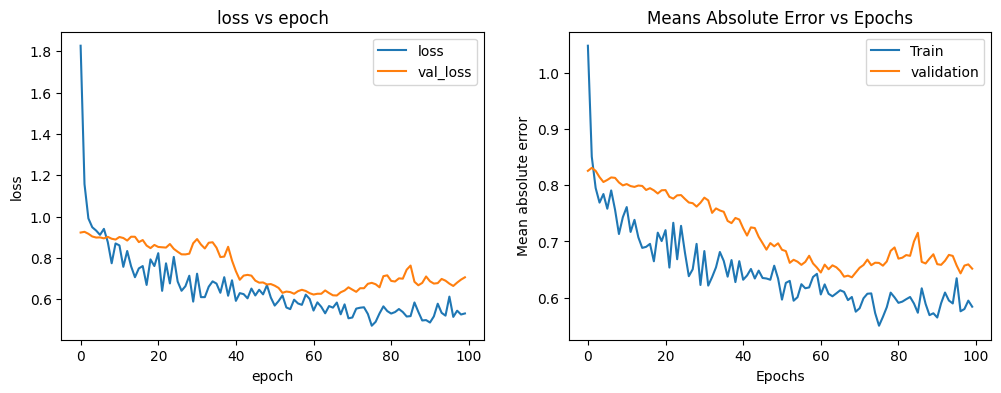

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

result = pd.DataFrame(history.history)

fig = plt.figure(figsize=(12,4))
epochs = np.arange(len(result))

ax = fig.add_subplot(121)
ax.plot(epochs,result['loss'],label="loss")
ax.plot(epochs,result['val_loss'],label="val_loss")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss vs epoch")
ax.legend()

ax = fig.add_subplot(122)
ax.plot(epochs,result['mae'],label="Train")
ax.plot(epochs,result["val_mae"],label="validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean absolute error")
ax.set_title("Means Absolute Error vs Epochs")
ax.legend()
